### Breast_Cancer_Classification_Using_ANN

Aim:-

1. The main aim of this project is to build an Artificial Nueral Networks and predict whether the breast cancer data is Malignant(Cancerous) or Benign(Non Cancerous).

### Steps used in this Project:-

1.   Import all the necessary Libraries

2.   Load Dataset

3.   Perform Data Exploration

4.   Do Data Preprocessing

5.   Select Features (X) and Target (y)

6.   Split Dataset into Train & Test

7.   Feature Scaling (Standardization)

8.   Build the ANN Model

9.   Compile the ANN

10.   Train the ANN

11.  Evaluate the Model

12.  Plot the training curves

13.  Make Predictions

14.  Take a sample data and check whether the breast cancer data is malignant or benign

### Step 1:  Import all the necessary Libraries

In [844]:
import   numpy              as    np
import   pandas             as    pd
import   matplotlib.pyplot  as    plt
import   seaborn            as    sns

from     sklearn.datasets             import   load_breast_cancer
from     sklearn.model_selection      import   train_test_split
from     sklearn.preprocessing        import   StandardScaler

from     tensorflow.keras.models      import   Sequential
from     tensorflow.keras.layers      import   Dense, Dropout, BatchNormalization
from     tensorflow.keras.callbacks   import   EarlyStopping,  ReduceLROnPlateau

### Step 2: Load Dataset

In [845]:
data = load_breast_cancer()

print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [846]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [847]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [848]:
### Construct the dataframe from the above data

df = pd.DataFrame(data.data, columns = data.feature_names)

In [849]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [850]:
### Adding the target to the dataset

df['target'] = data.target

In [851]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### OBSERVATIONS:

1. The above dataset contains the data about the breast cancer.

2. Input features are from mean radius ........worst fractal dimension.

3. Output feature is the target.

### Step 3: Perform Data Exploration

In [852]:
### Get the total length of the dataset

print("Total length of the dataset is:", len(df))

Total length of the dataset is: 569


In [853]:
### get the shape of the dataset

df.shape

(569, 31)

In [854]:
### get the top five records of the dataset

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [855]:
### get the bottom five records of the dataset

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [856]:
### get the columns used in the dataset

df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [857]:
### get the information about the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [858]:
### get the descriptive summary statistics in the dataset

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Step 4:   Do Data Preprocessing

In [859]:
### Check for the NULL Records in the dataset

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL records in the dataset.

In [860]:
### Check for the duplicate records in the dataset

df[df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


### OBSERVATIONS:

1. There are no duplicate records in the dataset.

### Step 5:  Select Features (X) and Target (y)

In [861]:
X = df.drop(columns='target')   ### independent features

Y = df['target']                ### dependent features

In [862]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [863]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [864]:
Y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

### Step 6: Split Dataset into Train & Test

In [865]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [866]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.32990,0.36300,0.12260,0.3175,0.09772
300,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.106200,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.61210,0.19800,0.2968,0.09929
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.1732,0.49670,0.59110,0.21630,0.3013,0.10670
230,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.109000,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.1703,0.39340,0.50180,0.25430,0.3109,0.09061


In [867]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.4251,0.19410,0.2818,0.10050
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.1663,0.09123,0.2394,0.06469
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.4098,0.15730,0.3689,0.08368
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,16.11,18.33,105.90,762.6,0.1386,0.28830,0.1960,0.14230,0.2590,0.07779
257,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.1765,0.45030,0.4429,0.22290,0.3258,0.11910
228,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,0.06019,...,14.20,31.31,90.67,624.0,0.1227,0.34540,0.3911,0.11800,0.2826,0.09585


In [868]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (455, 30)
Shape of the input testing  data is: (114, 30)


In [869]:
Y_train

546    1
432    0
174    1
221    1
289    1
      ..
184    0
300    0
509    0
230    0
474    1
Name: target, Length: 455, dtype: int64

In [870]:
Y_test

256    0
428    1
501    0
363    1
564    0
      ..
95     0
128    1
257    0
228    1
488    1
Name: target, Length: 114, dtype: int64

In [871]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (455,)
Shape of the output testing  data is: (114,)


### Step 7:  Feature Scaling (Standardization)

In [872]:
from sklearn.preprocessing import StandardScaler

### create an object for StandardScaler

sc = StandardScaler()


X_train_scaled = sc.fit_transform(X_train)

X_test_scaled  = sc.transform(X_test)

In [873]:
X_train_scaled

array([[-1.07200079, -0.6584246 , -1.0880801 , ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 1.74874285,  0.06650173,  1.75115682, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.97473376, -0.93112416, -0.99770871, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ...,
       [ 0.39844772,  1.06867262,  0.50751384, ...,  1.53492543,
         0.16164487,  1.23754763],
       [ 0.85331409, -0.0380331 ,  0.9054796 , ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.91179628, -0.82431683, -0.87666079, ..., -0.51332734,
        -0.50756857,  1.30824791]], shape=(455, 30))

In [874]:
X_test_scaled

array([[ 1.56851278,  2.16401585,  1.74286587, ...,  1.20214432,
        -0.14043064,  0.90036171],
       [-0.84027641, -0.5970672 , -0.8741735 , ..., -1.10124064,
        -0.81429139, -0.71323608],
       [-0.07072262,  1.19138742,  0.03202768, ...,  0.57255843,
         1.14997397,  1.86841162],
       ...,
       [ 0.3583966 , -0.44935493,  0.48264098, ...,  1.63386036,
         0.54117564,  1.91191948],
       [-0.41401799,  1.07321761, -0.42314565, ...,  0.06139464,
        -0.1280378 ,  0.64747227],
       [-0.6829327 , -0.69932953, -0.66607058, ..., -0.23615965,
        -0.16211811, -0.20147486]], shape=(114, 30))

### OBSERVATIONS:

1. All the input features are in the same range after performing feature scaling technique.

### Step 8:  Build the ANN Model

In [875]:
### Create an object for ANN Model

model = Sequential([
    ### create the first dense layer for ANN Model
    Dense(16, activation = 'relu', input_dim = X_train.shape[1])            ,
    ### Perform Batch Normalization
    BatchNormalization()                                                    ,
    ### Perform Dropout on the dense layer to reduce the overfitting
    Dropout(0.3)                                                            ,


    ### create the second dense layer for ANN Model
    Dense(8, activation = 'relu')                                           ,
    ### Perform Batch Normalization
    BatchNormalization()                                                    ,
    ### Perform Dropout on the dense layer to reduce the overfitting
    Dropout(0.15)                                                           ,


    ### create the second dense layer for ANN Model
    Dense(1, activation = 'sigmoid')   
] 
)


C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 9: Compile the ANN

In [876]:
model.compile(
    optimizer   =   'adam'                 ,
    loss        =   'binary_crossentropy'  ,
    metrics     =   ['accuracy']
)

### Step 10:  Train the ANN

In [877]:
er = EarlyStopping(
    monitor      =       'val_loss'                ,
    patience     =          8                      ,
    restore_best_weights = True
)


rdr = ReduceLROnPlateau(
    monitor    =        'val_loss'                ,
    factor     =           0.5                    ,
    patience   =            4                     ,
    verbose    =            1
)

In [878]:
history = model.fit(
    X_train_scaled                               ,
    Y_train                                      ,
    epochs           =       100                 ,
    batch_size       =       64                  ,
    validation_split =       0.2                 ,
    callbacks        =    [er,rdr]               ,
    verbose          =       2
)

Epoch 1/100
6/6 - 1s - 220ms/step - accuracy: 0.2637 - loss: 1.4457 - val_accuracy: 0.1648 - val_loss: 1.1746 - learning_rate: 1.0000e-03
Epoch 2/100
6/6 - 0s - 15ms/step - accuracy: 0.2500 - loss: 1.3479 - val_accuracy: 0.2198 - val_loss: 1.0849 - learning_rate: 1.0000e-03
Epoch 3/100
6/6 - 0s - 15ms/step - accuracy: 0.3049 - loss: 1.1954 - val_accuracy: 0.2637 - val_loss: 0.9946 - learning_rate: 1.0000e-03
Epoch 4/100
6/6 - 0s - 15ms/step - accuracy: 0.3736 - loss: 1.0582 - val_accuracy: 0.3077 - val_loss: 0.8986 - learning_rate: 1.0000e-03
Epoch 5/100
6/6 - 0s - 15ms/step - accuracy: 0.4588 - loss: 0.8738 - val_accuracy: 0.3736 - val_loss: 0.8039 - learning_rate: 1.0000e-03
Epoch 6/100
6/6 - 0s - 15ms/step - accuracy: 0.5357 - loss: 0.8106 - val_accuracy: 0.5165 - val_loss: 0.7116 - learning_rate: 1.0000e-03
Epoch 7/100
6/6 - 0s - 14ms/step - accuracy: 0.6154 - loss: 0.6609 - val_accuracy: 0.6044 - val_loss: 0.6301 - learning_rate: 1.0000e-03
Epoch 8/100
6/6 - 0s - 15ms/step - accur

### OBSERVATIONS:

1.The accuracy of the model has increased a lot and the loss value has reduced. So the model has been trained well.

### Step 11: Evaluate the Model

In [879]:
loss, acc = model.evaluate(X_test_scaled, Y_test, verbose = 0)

print("Loss Function is:", loss)

print("Test Accuracy is:", acc)

Loss Function is: 0.09679649025201797
Test Accuracy is: 0.9736841917037964


### OBSERVATIONS:

1.  The test accuracy of the model is very high

2.  The loss function is very low

So the model is woking completely fine.

### Step 12: Plot the training curves

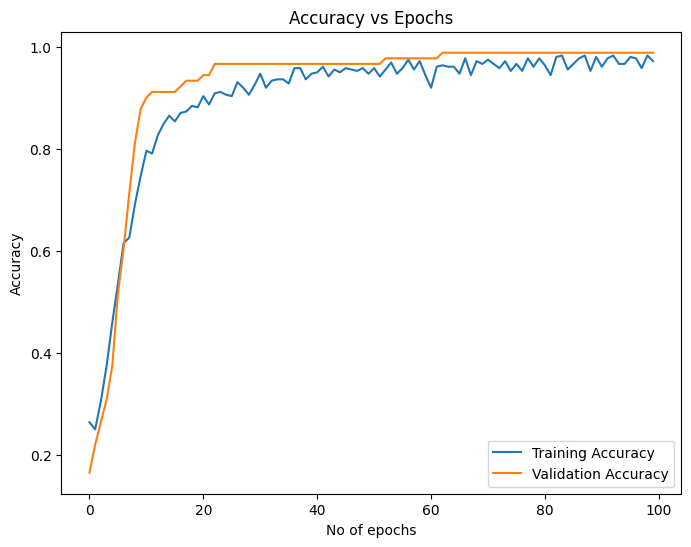

In [880]:
plt.figure(figsize=(8,6))

plt.plot(history.history['accuracy'],     label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("No of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### OBSERVATIONS:

1. With the increase in the number of epochs, the training and validation increases and then after some times the graph becomes stable.

### Step 13: Make Predictions

In [881]:
Y_pred = model.predict(X_test_scaled)

Y_pred = (Y_pred > 0.5)

print(Y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]

### Step 14:  Take a sample data and check whether the breast cancer data is malignant or benign

In [882]:
sample = X_test.iloc[[0]]

In [883]:
df[df['mean radius'] == 19.55]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
256,19.55,28.77,133.6,1207.0,0.0926,0.2063,0.1784,0.1144,0.1893,0.06232,...,36.27,178.6,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050,0
389,19.55,23.21,128.9,1174.0,0.1010,0.1318,0.1856,0.1021,0.1989,0.05884,...,30.44,142.0,1313.0,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602,0


In [884]:
### Trasnform the data

transformed_data = sc.transform(sample)

In [885]:
transformed_data

array([[ 1.56851278,  2.16401585,  1.74286587,  1.62076364, -0.26537607,
         1.91593165,  1.09245512,  1.69889576,  0.30958918, -0.06988421,
         1.6582331 , -0.03455846,  2.19927944,  1.6097947 , -0.2323368 ,
         1.19871549,  0.18795672,  0.55981664, -0.16207336,  0.52383207,
         1.86216011,  1.70820774,  2.17062246,  1.91370109, -0.18774006,
         1.74427462,  0.68856004,  1.20214432, -0.14043064,  0.90036171]])

In [886]:
### perform the predictions

predictions = model.predict(transformed_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [887]:
predictions = predictions.astype(int)

In [888]:
predictions

array([[0]])

In [889]:
if(predictions == 0):
    print("Benign(Non Cancerous)")
else:
    print("Malignant(Cancerous)")

Benign(Non Cancerous)
